<a href="https://colab.research.google.com/github/hitomitsu50/SportsData_Portfolio/blob/main/%E9%87%8E%E7%90%83%E3%83%87%E3%83%BC%E3%82%BF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#モジュールのインポート
! pip install japanize_matplotlib
import japanize_matplotlib
import pandas as pd
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 57.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=e7be7b14f79197f7cff319c7431b6398d380171f9f970b6928cc1bdbd0da89ad
  Stored in directory: /root/.cache/pip/wheels/c1/f7/9b/418f19a7b9340fc16e071e89efc379aca68d40238b258df53d
Successfully built japanize_matplotlib


In [2]:
#データの読み込み
df=pd.read_csv("sample_data/2022_Ohtani.csv")
df.head()

,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches
0,0,ST,2022-09-29,85.6,-2.52,5.75,"Ohtani, Shohei",669127,660271,field_out,...,1,2.46,-0.98,-0.98,33.1,NaN,NaN,NaN,NaN,NaN
1,1,ST,2022-09-29,84.3,-2.58,5.64,"Ohtani, Shohei",669127,660271,NaN,...,1,2.99,-1.47,-1.47,30.5,NaN,NaN,NaN,NaN,NaN
2,2,ST,2022-09-29,84.7,-3.19,5.48,"Ohtani, Shohei",669127,660271,NaN,...,1,2.62,-1.11,-1.11,24.7,NaN,NaN,NaN,NaN,NaN
3,3,ST,2022-09-29,84.7,-2.63,5.70,"Ohtani, Shohei",669127,660271,NaN,...,1,2.85,-0.94,-0.94,30.1,NaN,NaN,NaN,NaN,NaN
4,4,SL,2022-09-29,83.2,-1.96,6.26,"Ohtani, Shohei",669127,660271,NaN,...,1,3.38,-0.45,-0.45,43.4,NaN,NaN,NaN,NaN,NaN


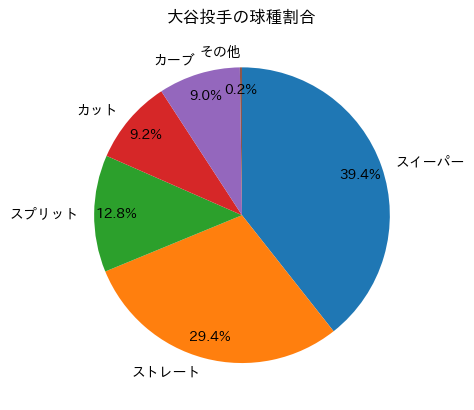

In [3]:
# 球種別のカウントを計算
counts = df["pitch_type"].value_counts()

# 合計を計算
total_counts = counts.sum()

# 各球種の割合を計算
percentages = counts / total_counts * 100

# 5%未満の球種を特定
other_pitches = percentages[percentages < 5]

# 5%未満の球種の合計カウントを計算
other_count = other_pitches.sum()

# 5%以上の球種と「その他」のカウントを含む新しいSeriesを作成
new_counts = counts[percentages >= 5].copy() # copy()を追加してSettingWithCopyWarningを防ぐ
if other_count > 0:
    new_counts['その他'] = other_count

# 球種名のマッピング
pitch_name_mapping = {
    'ST': 'スイーパー',
    'FF': 'ストレート',
    'FS': 'スプリット',
    'FC': 'カット',
    'CU': 'カーブ',
    'SI': 'シンカー',
    'SL': 'スライダー',
    'CS': 'チェンジアップ'
}

# 新しいcountsのインデックスをマッピングに基づいて変更し、マッピングされなかったものは元の名前を維持
new_labels = [pitch_name_mapping.get(label, label) for label in new_counts.index]


# 新しいcountsで円グラフを作成
plt.pie(new_counts, labels=new_labels, counterclock=False, startangle=90, autopct='%1.1f%%', pctdistance=0.85, labeldistance=1.1)

# タイトルの追加
plt.title("大谷投手の球種割合")
plt.show()

In [ ]:
# pitch_type 列のユニークな値を表示
unique_pitch_types = df["pitch_type"].unique()
print("pitch_typeの種類:")
print(unique_pitch_types)

pitch_typeの種類:
['ST' 'SL' 'FC' 'FS' 'CU' 'SI' 'FF' 'CS']


In [5]:
#2025/10/15
#単位の変換
df["speed_km"]=df["release_speed"]*1.61
df.head()

,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches,speed_km
0,0,ST,2022-09-29,85.6,-2.52,5.75,"Ohtani, Shohei",669127,660271,field_out,...,2.46,-0.98,-0.98,33.1,NaN,NaN,NaN,NaN,NaN,137.816
1,1,ST,2022-09-29,84.3,-2.58,5.64,"Ohtani, Shohei",669127,660271,NaN,...,2.99,-1.47,-1.47,30.5,NaN,NaN,NaN,NaN,NaN,135.723
2,2,ST,2022-09-29,84.7,-3.19,5.48,"Ohtani, Shohei",669127,660271,NaN,...,2.62,-1.11,-1.11,24.7,NaN,NaN,NaN,NaN,NaN,136.367
3,3,ST,2022-09-29,84.7,-2.63,5.70,"Ohtani, Shohei",669127,660271,NaN,...,2.85,-0.94,-0.94,30.1,NaN,NaN,NaN,NaN,NaN,136.367
4,4,SL,2022-09-29,83.2,-1.96,6.26,"Ohtani, Shohei",669127,660271,NaN,...,3.38,-0.45,-0.45,43.4,NaN,NaN,NaN,NaN,NaN,133.952


In [6]:
#球種ごとに分類
Fastball=df[df["pitch_type"]=="FF"]#ストレート
Cutter=df[df["pitch_type"]=="FC"]#カット
Sweeper=df[df["pitch_type"]=="ST"]#スイーパー
Curve=df[df["pitch_type"]=="CU"]#カーブ
Splitter=df[df["pitch_type"]=="FS"]#スプリット

In [7]:
#球種名と各平均球速をリストに格納
x=["ストレート","カット","スイーパー","カーブ","スプリット"]
y=[Fastball["speed_km"].mean(),Cutter["speed_km"].mean(),Sweeper["speed_km"].mean(),Curve["speed_km"].mean(),
   Splitter["speed_km"].mean()]

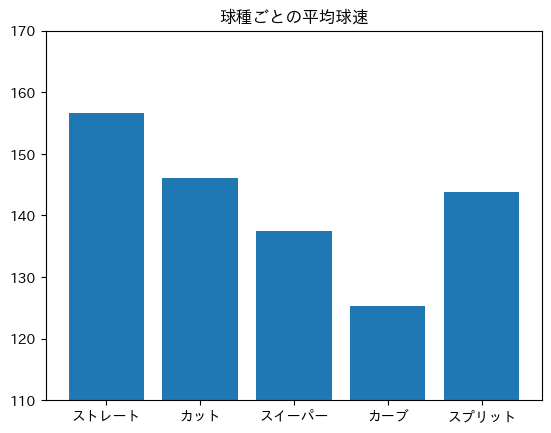

In [9]:
#棒グラフの作成
plt.bar(x,y)
plt.title("球種ごとの平均球速")
#y軸の幅を設定
plt.ylim(110,170)
plt.show()

In [13]:
#イニングごとの平均球速をリストに格納
x,y=[],[]
for i in range(1,10):
  inning=Fastball[Fastball["inning"]==i]
  x.append(i)
  y.append(inning["speed_km"].mean())
y

[np.float64(155.95601265822788),
 np.float64(156.48946456692912),
 np.float64(156.27350000000004),
 np.float64(156.79364367816092),
 np.float64(157.2165),
 np.float64(157.84931944444443),
 np.float64(156.4115),
 np.float64(156.975),
 nan]

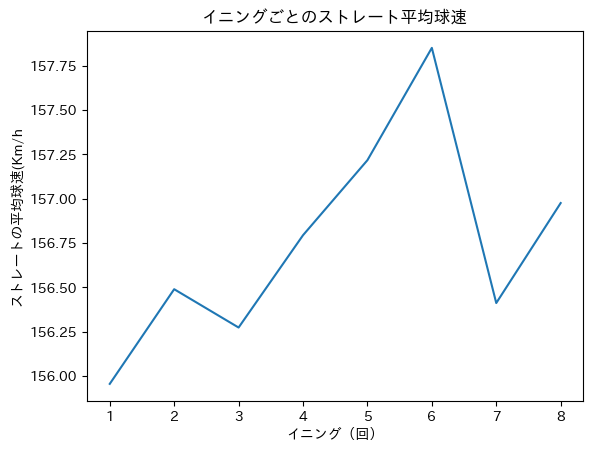

In [15]:
#折れ線グラフの作成
plt.plot(x,y)
plt.title("イニングごとのストレート平均球速")
#x軸とy軸にラベルを追加
plt.xlabel("イニング（回）")
plt.ylabel("ストレートの平均球速(Km/h")
plt.show()

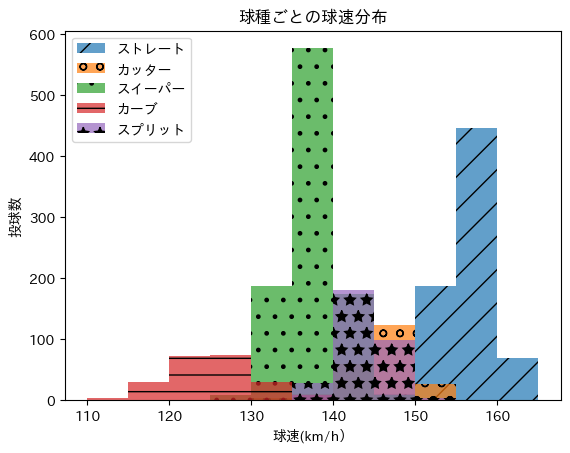

In [17]:
#棒の境界となる値をリストに格納
border=[110,115,120,125,130,135,140,145,150,155,160,165]

#ヒストグラムの作成
plt.hist(Fastball["speed_km"],alpha=0.7,hatch="/",label="ストレート",bins=border)
plt.hist(Cutter["speed_km"],alpha=0.7,hatch="o",label="カッター",bins=border)
plt.hist(Sweeper["speed_km"],alpha=0.7,hatch=".",label="スイーパー",bins=border)
plt.hist(Curve["speed_km"],alpha=0.7,hatch="-",label="カーブ",bins=border)
plt.hist(Splitter["speed_km"],alpha=0.7,hatch="*",label="スプリット",bins=border)
#見た目の調整
plt.title("球種ごとの球速分布")
plt.xlabel("球速(km/h）")
plt.ylabel("投球数")
plt.legend(loc="upper left")
plt.show()